# Modeling of pulsar dispersion delay removing

### Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### Define variables

In [2]:
DM0 = 6.0                    # pc/cm3
DM_target = 5.7              # pc/cm3
fmin = 16.5                  # MHz
fmax = 33.0                  # MHz
freq_points_disp = 5000      # number of frequency channels
freq_points_dedisp = 500     # number of frequency channels
time_points = 700            # number of time points
TimeRes = 0.1                # sec
pulsarPeriod = 2             # sec

freq_ratio = int(freq_points_disp / freq_points_dedisp)
time = np.linspace(0, time_points-1, time_points)
DM_residual = DM0 - DM_target

### Making dynamic apectrum of ideal pulse without dispersion

In [3]:
dyn_spectra_initial = np.zeros((freq_points_disp, time_points))
dyn_spectra_initial[:, 30] = 1

Text(0, 0.5, 'Frequency channels')

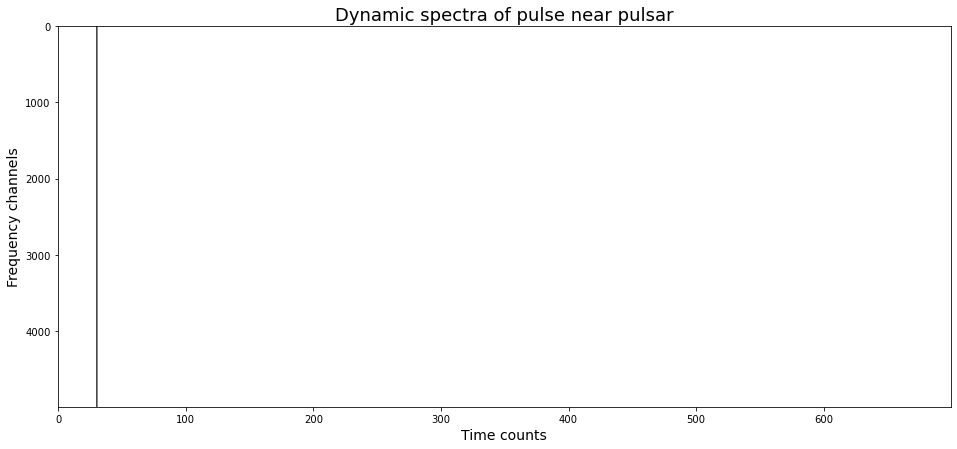

In [4]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_initial), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse near pulsar', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14)

### Adding dispersion delay with high frequency resolution (model of natural dispersion)

In [5]:
dyn_spectra_delayed = np.empty_like(dyn_spectra_initial)
dyn_spectra_delayed[:,:] = dyn_spectra_initial[:,:]
df = (fmax - fmin) / freq_points_disp
dt = np.zeros((freq_points_disp), dtype = 'float')                # time of shifting channel to dedisperse
for i in range (freq_points_disp):
    dt[i] = (DM0 / 2.410331) * ((10000./np.power((fmin + df * i), 2)) - (10000./np.power(fmax, 2)))
shiftPar = np.zeros((freq_points_disp), dtype = 'int')            # number of steps to shift each row
for i in range (freq_points_disp):
    shiftPar[i] = 1 * round(pulsarPeriod * (dt[i] / pulsarPeriod) / TimeRes)
    dyn_spectra_delayed[i] = np.roll(dyn_spectra_delayed[i], shiftPar[i])

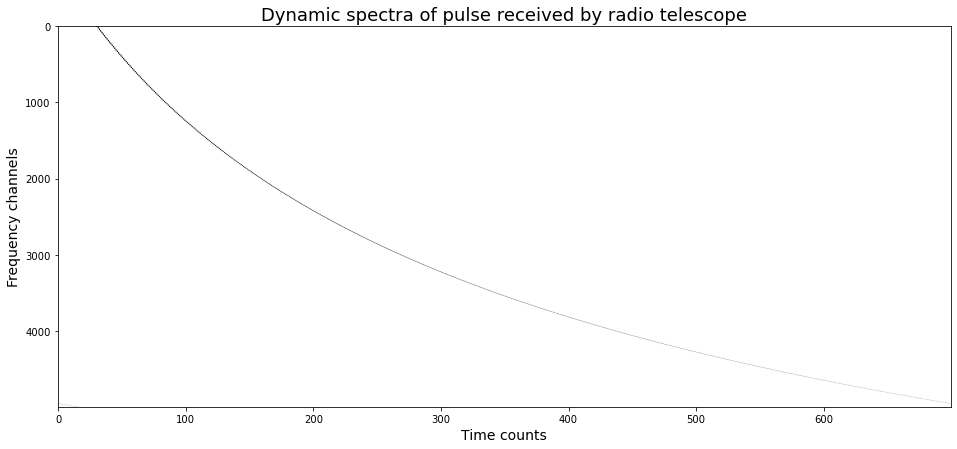

In [6]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_delayed), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse received by radio telescope', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Dispersion delay removal with incoherent method in frequency channels of receiver (model of incoherent method)

In [7]:
dyn_spectra_incoherent = np.empty_like(dyn_spectra_delayed)
dyn_spectra_incoherent[:,:] = dyn_spectra_delayed[:,:]
df = (fmax - fmin) / freq_points_dedisp
dt = np.zeros((freq_points_dedisp), dtype = 'float')                # time of shifting channel to dedisperse
for i in range (freq_points_dedisp):
    dt[i] = (DM0 / 2.410331) * ((10000./np.power((fmin + df * i), 2)) - (10000./np.power(fmax, 2)))
shiftPar = np.zeros((freq_points_dedisp), dtype = 'int')            # number of steps to shift each row
for i in range (freq_points_dedisp):
    shiftPar[i] = -1 * round(pulsarPeriod * (dt[i] / pulsarPeriod) / TimeRes)
    dyn_spectra_incoherent[i*freq_ratio:(i+1)*freq_ratio] = np.roll(dyn_spectra_incoherent[i*freq_ratio:(i+1)*freq_ratio], shiftPar[i])

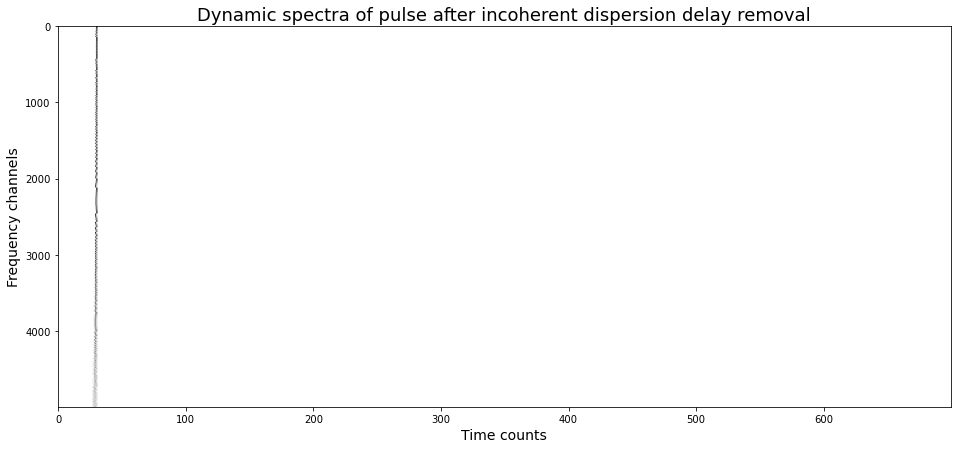

In [8]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_incoherent), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse after incoherent dispersion delay removal', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Closer look to incoherent method results

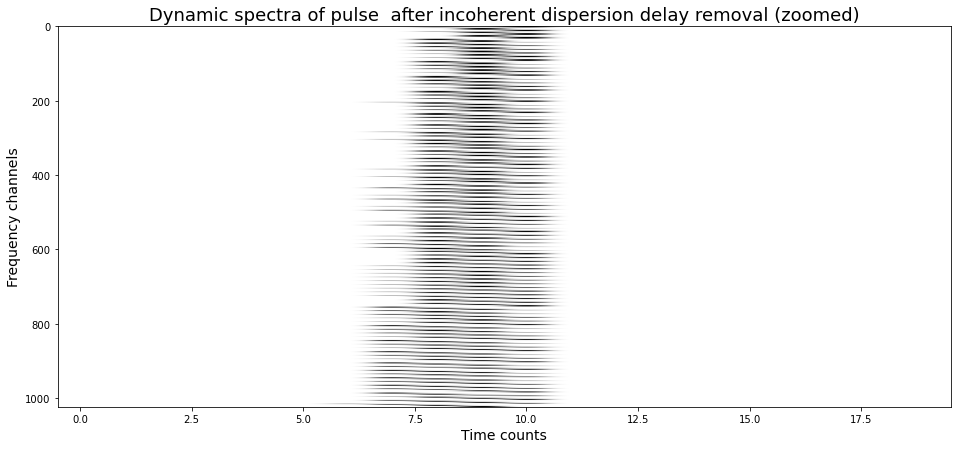

In [9]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_incoherent[0:1024, 20:40]), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse  after incoherent dispersion delay removal (zoomed)', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Making "coherent dispersion delay removal" with true DM value just to check...

In [10]:
dyn_spectra_coherent_full = np.empty_like(dyn_spectra_delayed)
dyn_spectra_coherent_full[:,:] = dyn_spectra_delayed[:,:]
df = (fmax - fmin) / freq_points_disp
dt = np.zeros((freq_points_disp), dtype = 'float')                # time of shifting channel to dedisperse
for i in range (freq_points_disp):
    dt[i] = (DM0 / 2.410331) * ((10000./np.power((fmin + df * i), 2)) - (10000./np.power(fmax, 2)))
shiftPar = np.zeros((freq_points_disp), dtype = 'int')            # number of steps to shift each row
for i in range (freq_points_disp):
    shiftPar[i] = -1 * round(pulsarPeriod * (dt[i] / pulsarPeriod) / TimeRes)
    dyn_spectra_coherent_full[i] = np.roll(dyn_spectra_coherent_full[i], shiftPar[i])

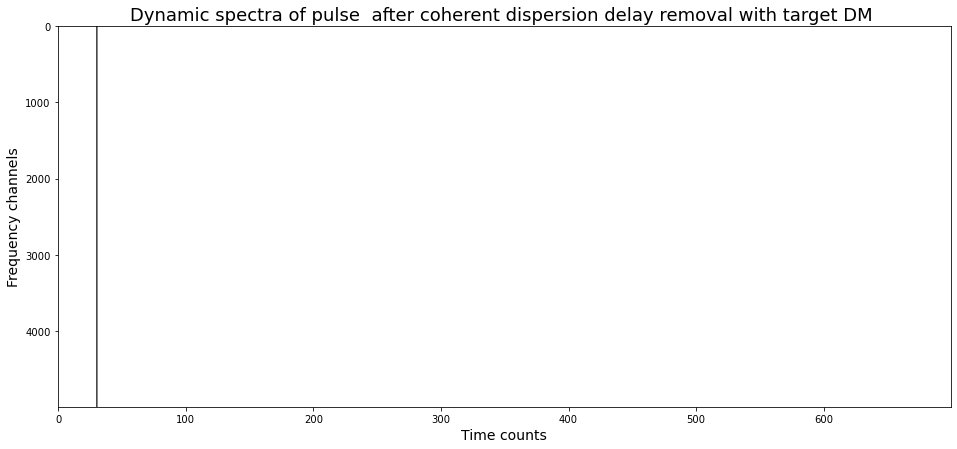

In [11]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
plt.imshow(np.flipud(dyn_spectra_coherent_full), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse  after coherent dispersion delay removal with target DM ', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Closer look to 'coherent' method with true DM results

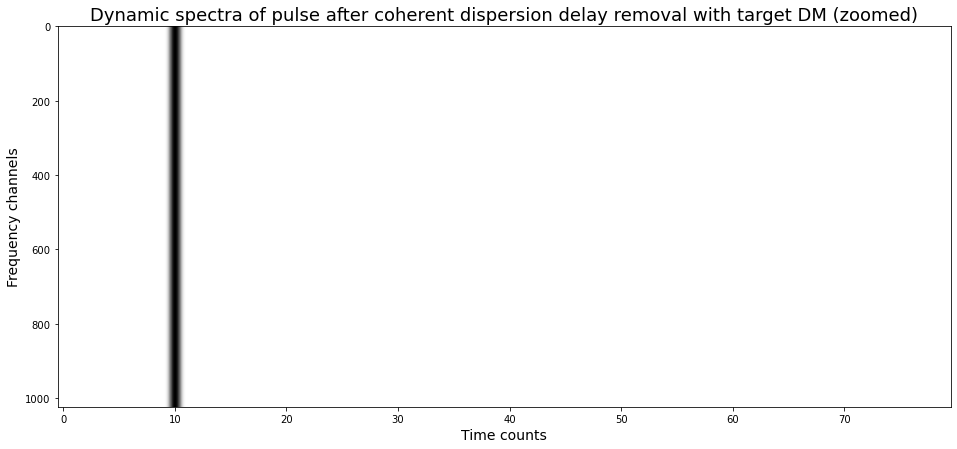

In [12]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_coherent_full[0:1024, 20:100]), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse after coherent dispersion delay removal with target DM (zoomed)', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Making "coherent dispersion delay removal" with target DM value

In [13]:
dyn_spectra_coherent = np.empty_like(dyn_spectra_delayed)
dyn_spectra_coherent[:,:] = dyn_spectra_delayed[:,:]
df = (fmax - fmin) / freq_points_disp
dt = np.zeros((freq_points_disp), dtype = 'float')                # time of shifting channel to dedisperse
for i in range (freq_points_disp):
    dt[i] = (DM_target / 2.410331) * ((10000./np.power((fmin + df * i), 2)) - (10000./np.power(fmax, 2)))
shiftPar = np.zeros((freq_points_disp), dtype = 'int')            # number of steps to shift each row
for i in range (freq_points_disp):
    shiftPar[i] = -1 * round(pulsarPeriod * (dt[i] / pulsarPeriod) / TimeRes)
    dyn_spectra_coherent[i] = np.roll(dyn_spectra_coherent[i], shiftPar[i])

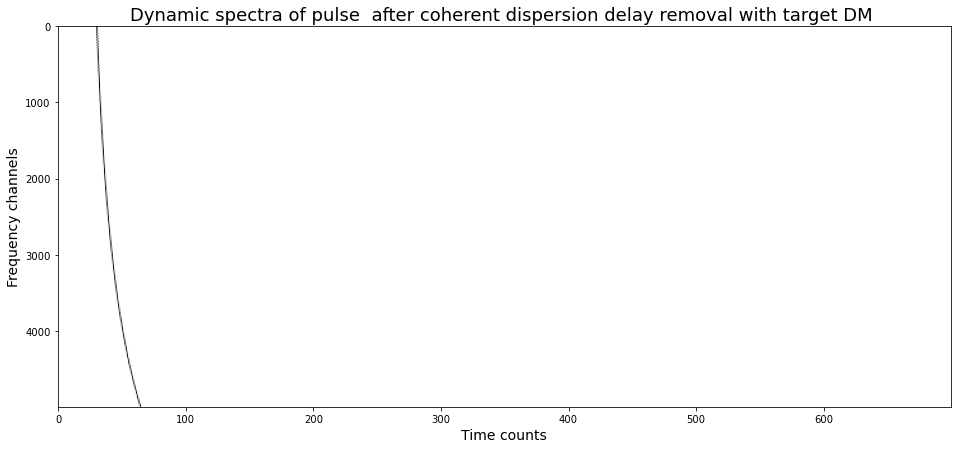

In [14]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
plt.imshow(np.flipud(dyn_spectra_coherent), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse  after coherent dispersion delay removal with target DM ', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Closer look to 'coherent' method with target DM results

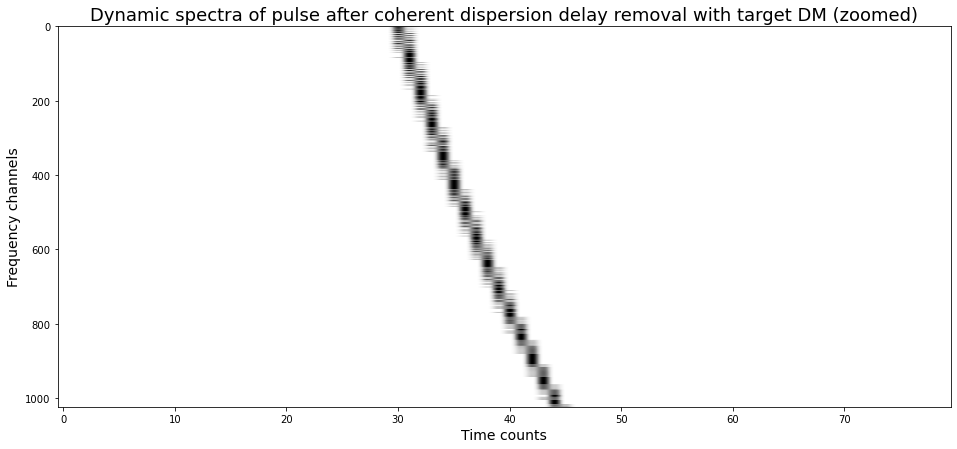

In [15]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_coherent[0:1024, 20:100]), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse after coherent dispersion delay removal with target DM (zoomed)', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Making additional incoherent dispersion delay removal (implementing hybrid algorithm)

In [16]:
dyn_spectra_hybrid = np.empty_like(dyn_spectra_coherent)
dyn_spectra_hybrid[:,:] = dyn_spectra_coherent[:,:]
df = (fmax - fmin) / freq_points_dedisp
dt = np.zeros((freq_points_dedisp), dtype = 'float')                # time of shifting channel to dedisperse
for i in range (freq_points_dedisp):
    dt[i] = (DM_residual / 2.410331) * ((10000./np.power((fmin + df * i), 2)) - (10000./np.power(fmax, 2)))
shiftPar = np.zeros((freq_points_dedisp), dtype = 'int')            # number of steps to shift each row
for i in range (freq_points_dedisp):
    shiftPar[i] = -1 * round(pulsarPeriod * (dt[i] / pulsarPeriod) / TimeRes)
    dyn_spectra_hybrid[i*freq_ratio:(i+1)*freq_ratio] = np.roll(dyn_spectra_hybrid[i*freq_ratio:(i+1)*freq_ratio], shiftPar[i])

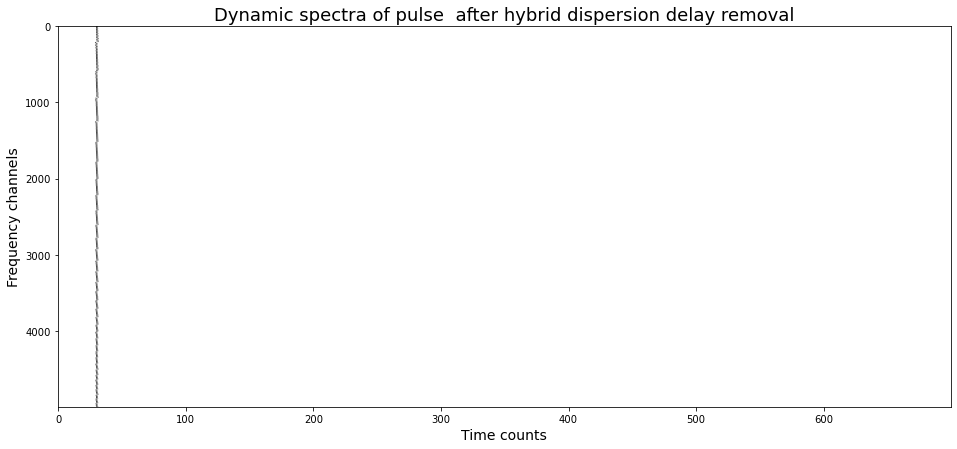

In [17]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_hybrid), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse  after hybrid dispersion delay removal', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Closer look to 'coherent' method results

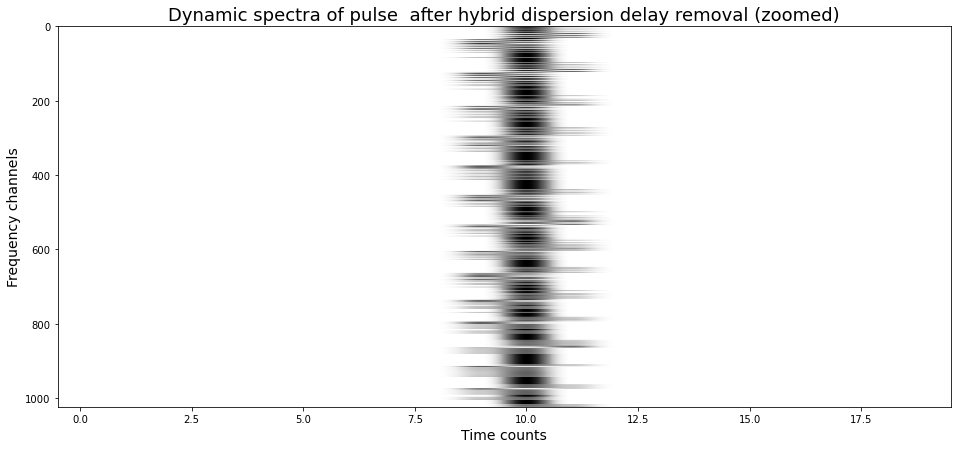

In [18]:
fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.imshow(np.flipud(dyn_spectra_hybrid[0:1024, 20:40]), aspect='auto', cmap = "Greys");
ax1.set_title('Dynamic spectra of pulse  after hybrid dispersion delay removal (zoomed)', fontsize = 18)
ax1.set_xlabel('Time counts', fontsize=14)
ax1.set_ylabel('Frequency channels', fontsize=14);

### Comparison of obtained pulses 

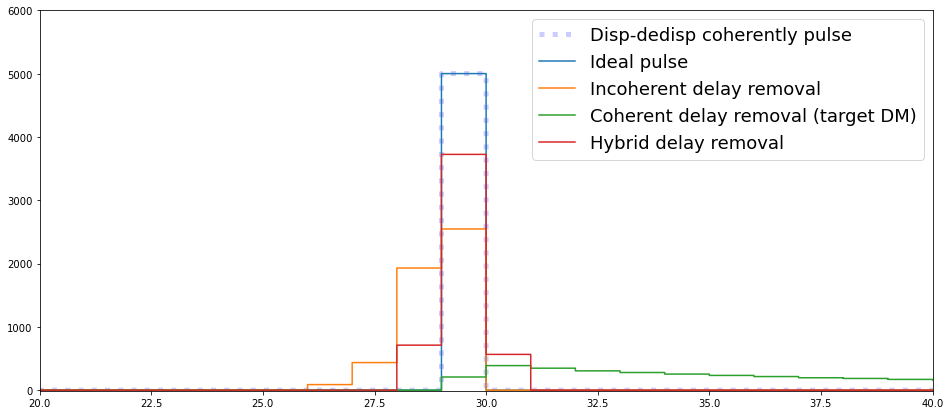

In [19]:
profile_full = np.sum(dyn_spectra_coherent_full, axis = 0)
profile_initial = np.sum(dyn_spectra_initial, axis = 0)
profile_incoherent = np.sum(dyn_spectra_incoherent, axis = 0)
profile_coherent = np.sum(dyn_spectra_coherent, axis = 0)
profile_hybrid = np.sum(dyn_spectra_hybrid, axis = 0)
dyn_spectra_coherent_full

fig = plt.figure(figsize = (16.0, 7.0))
ax1 = fig.add_subplot(111)
ax1.step(time, profile_full, label = 'Disp-dedisp coherently pulse', color ='b', linestyle = ':', alpha=0.2, linewidth = '5.0');
ax1.step(time, profile_initial, label = 'Ideal pulse');
ax1.step(time, profile_incoherent, label = 'Incoherent delay removal');
ax1.step(time, profile_coherent, label = 'Coherent delay removal (target DM)');
ax1.step(time, profile_hybrid, label = 'Hybrid delay removal');

ax1.axis([20, 40, -10, 6000])
ax1.legend(loc = 'upper right', fontsize = 18);